In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import functions as fa

# **Config**
---

In [2]:
sns.set_theme(style='darkgrid')
title_data = 'Data Sampling Time'
paleta = sns.color_palette("tab10").as_hex()

# **Data**
---

Contains information about gas temperatura.

- **key** is used to identify the steel batch number.
- **Sampling time** date and time when doing measurement.
- **Temperature** temperature when doing measurement

In [3]:
url_data_sampling = 'https://drive.google.com/file/d/1fsV-eF3QRHKSP9HchfB73DXlcT2ZTzSE/view?usp=sharing'
url_data_sampling = 'https://drive.google.com/uc?id=' + url_data_sampling.split('/')[-2]
data_sampling = pd.read_csv(url_data_sampling)

In [4]:
data_sampling.head()

,key,Sampling time,Temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


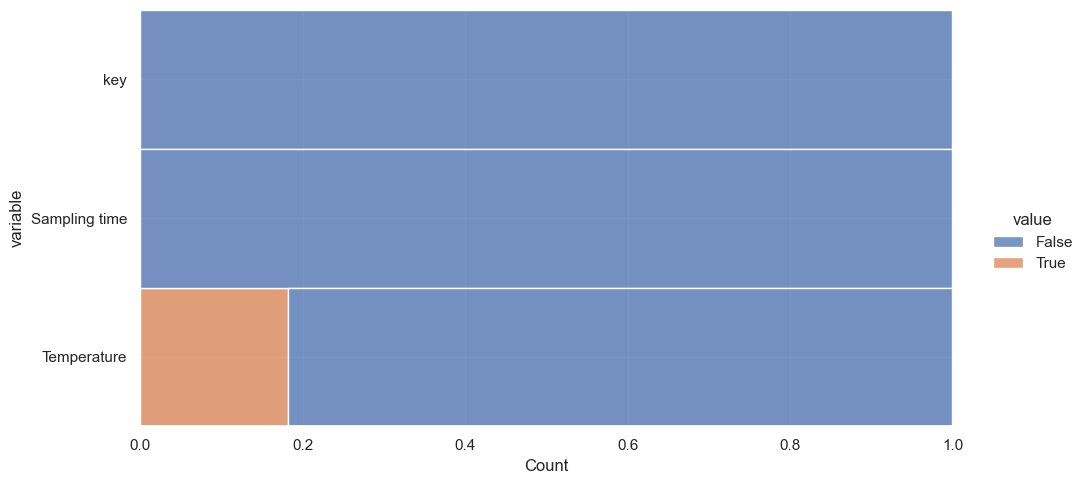

In [5]:
fa.porcentaje_nulos_x_caracteristica(data_sampling)

In [6]:
data_sampling['Temperature'].isnull().sum() / data_sampling.shape[0]

0.18237254039102282

In [7]:
data_sampling.columns

Index(['key', 'Sampling time', 'Temperature'], dtype='object')

- El 18% de los valores son nulos en la temperatura
- -18% of the values are null in temperature-

In [8]:
function_dictionary = {
    'Temperature': ['sum']
}

filter_feature = [
    'key'
]

data_sampling_temp = data_sampling.groupby(
    filter_feature
).aggregate(function_dictionary).reset_index()

In [9]:
data_sampling_temp.columns = ['key', 'sum_temperature']

In [10]:
data_sampling_temp.sort_values(by='sum_temperature', ascending=False)

,key,sum_temperature
41,44,25637.0
43,46,25536.0
1201,1214,25245.0
1498,1513,25216.0
1674,1689,23867.0
...,...,...
2881,2905,1534.0
3082,3106,1534.0
2940,2964,1534.0
2865,2889,1529.0


The batches with the highest temperature are 44, 46, 1214, 1513

<Axes: xlabel='sum_temperature'>

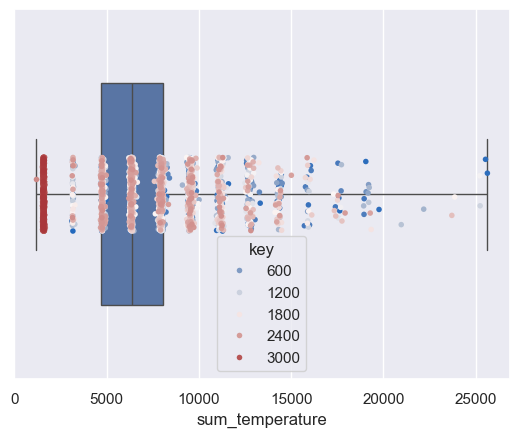

In [11]:
sns.boxplot(
    data_sampling_temp, x="sum_temperature",
    whis=[0, 100], width=.6,
)
sns.stripplot(
    data_sampling_temp, 
    x="sum_temperature", 
    size=4, 
    hue='key',
    palette="vlag")



In [12]:
data_sampling_temp

,key,sum_temperature
0,1,8007.0
1,2,9561.0
2,3,7989.0
3,4,4849.0
4,5,3178.0
...,...,...
3211,3237,1569.0
3212,3238,1584.0
3213,3239,1598.0
3214,3240,1617.0
